<a href="https://colab.research.google.com/github/AnanyaUp/startup-profit-prediction/blob/main/codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for plotting graphics
import pandas as pd # for handling and cleaning the dataseCt
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [2]:
dataset = pd.read_csv('/content/50_Startups.csv')

In [3]:
print(dataset.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [4]:
print(dataset.tail())

    R&D Spend  Administration  Marketing Spend    Profit
45    1000.23       124153.04          1903.93  64926.08
46    1315.46       115816.21        297114.46  49490.75
47       0.00       135426.92             0.00  42559.73
48     542.05        51743.15             0.00  35673.41
49       0.00       116983.80         45173.06  14681.40


In [5]:
print(dataset.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [7]:
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  50 rows and  4 columns in the dataset.


In [8]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [10]:
dataset.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Profit,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [12]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


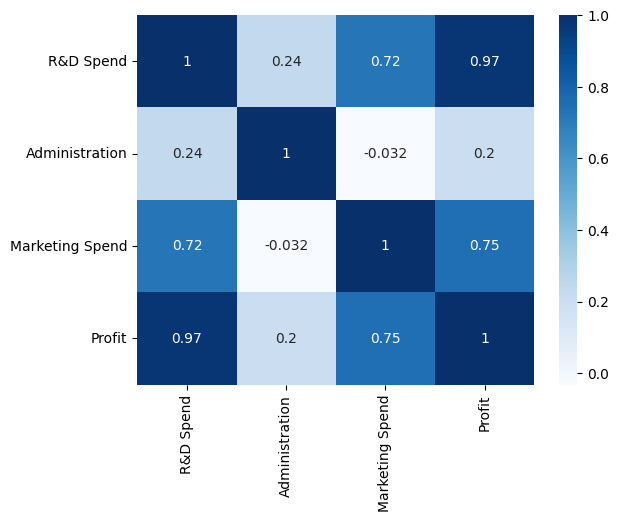

In [13]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

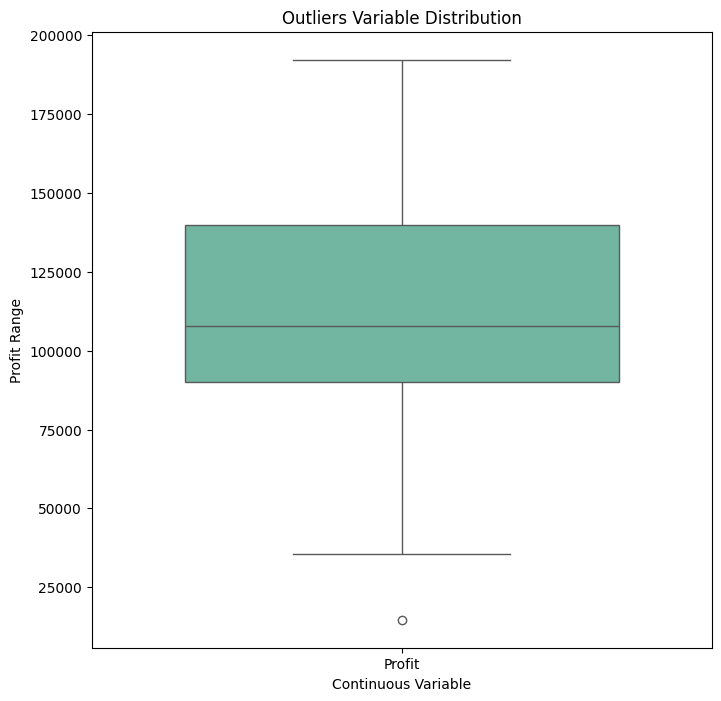

In [14]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v"
 # orient = "h"
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
plt.show()

/tmp/ipython-input-1942353725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Profit'],bins=5,kde=True)


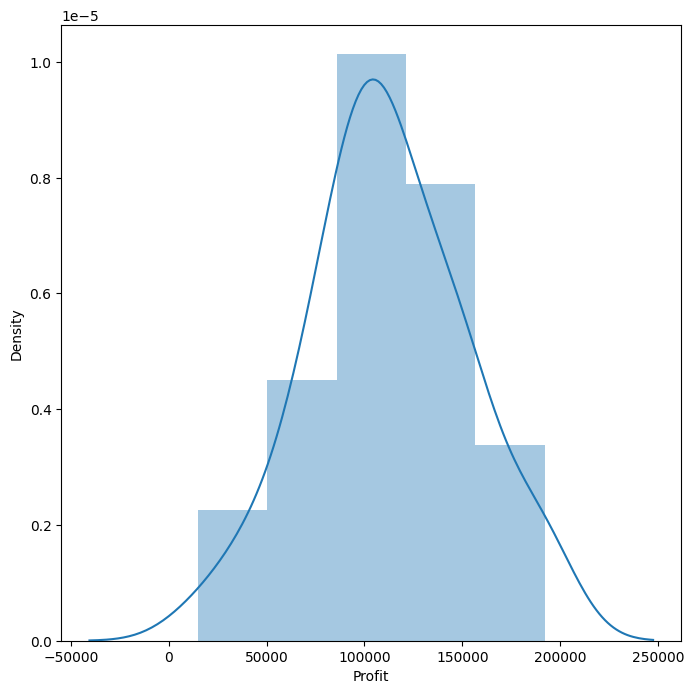

In [15]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

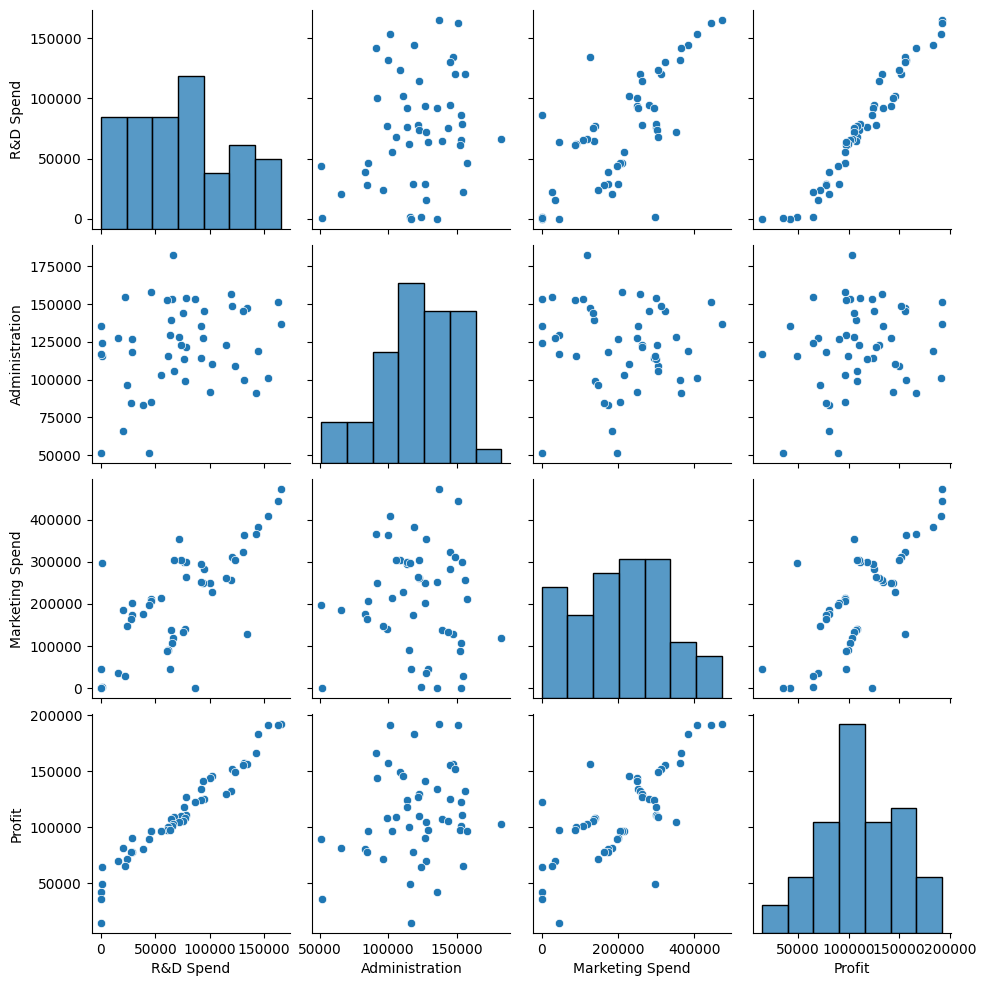

In [16]:
sns.pairplot(dataset)
plt.show()

In [18]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[1.3029813e+05, 1.4553006e+05, 4.0000000e+01],
       [1.1994324e+05, 1.5654742e+05, 2.8000000e+01],
       [1.0002300e+03, 1.2415304e+05, 1.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 8.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.9000000e+01],
       [6.1994480e+04, 1.1564128e+05, 7.0000000e+00],
       [6.3408860e+04, 1.2921961e+05, 5.0000000e+00],
       [7.8013110e+04, 1.2159755e+05, 3.0000000e+01],
       [2.3640930e+04, 9.6189630e+04, 1.4000000e+01],
       [7.6253860e+04, 1.1386730e+05, 3.4000000e+01],
       [1.5505730e+04, 1.2738230e+05, 3.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.9000000e+01],
       [9.1992390e+04, 1.3549507e+05, 2.7000000e+01],
       [6.4664710e+04, 1.3955316e+05, 1.2000000e+01],
       [1.3187690e+05, 9.9814710e+04, 4.2000000e+01],
       [9.4657160e+04, 1.4507758e+05, 3.1000000e+01],
       [2.8754330e+04, 1.1854605e+05, 1.6000000e+01],
       [0.0000000e+00, 1.169

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

y_pred = model.predict(x_test)
y_pred

Model has been trained successfully


array([103365.65430448, 132409.63159464, 133669.58924177,  71596.33493623,
       179574.8809234 , 114195.96899299,  65656.85292429,  97938.81018901,
       114412.29898539, 169772.36831918,  96050.9051499 ,  87515.25731045,
       110242.6075272 ,  90000.89195708, 127479.23515393])

In [22]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten() })
df

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848


,Predicted value,Actual Value
0,103365.654304,103282.38
1,132409.631595,144259.40
2,133669.589242,146121.95
3,71596.334936,77798.83
4,179574.880923,191050.39
5,114195.968993,105008.31
6,65656.852924,81229.06
7,97938.810189,97483.56
8,114412.298985,110352.25
9,169772.368319,166187.94


In [24]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse)

rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

R2 score of model is : 93.21346390789374
Mean Squarred Error is : 65245193.62317415
Root Mean Squarred Error is :  8077.4496979661935
Mean Absolute Error is : 6603.238628961082
